# Census Data Analysis


### Background:

Every ten years, the United Kingdom undertakes a census of the population, with the most recent one having
been conducted in 2021. 

The purpose of such a census is to compare different people across the nation and to
provide the government with accurate statistics of the population to enable better planning, to develop policies,
and to allocate certain funding.

In the project, you will be provided with a mock census of an imaginary modest town. I would like you to
consider yourselves to be part of a local government team who will be making decisions on what to do with an
unoccupied plot of land and what to invest in. To address these questions, you will need to clean and analyse the
mock census data provided.

## Importing the necessary library for my Census Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings 
warnings.simplefilter("ignore")

## A - Importing my data set for cleaning and analysis

In [2]:
try:
    #pd.set_option('display.max_rows', None)
    census_data = pd.read_csv('census06.csv') 

except Exception as exc:
    print(exc)

## B - Inspecting my imported datasets

In [3]:
census_data

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
0,1,Scott Dale,Maureen,Cox,50,Head,Single,Female,"Engineer, building services",None,Catholic
1,1,Scott Dale,Rhys,Brown,52,Partner,Single,Male,"Engineer, mining",None,Catholic
2,2,Scott Dale,Lorraine,Allen,69,Head,Married,Female,Unemployed,None,Methodist
3,2,Scott Dale,Lewis,Allen,72,Husband,Married,Male,Retired Associate Professor,None,Methodist
4,3,Scott Dale,Molly,Patel,36,Head,Married,Female,"Engineer, land",None,None
...,...,...,...,...,...,...,...,...,...,...,...
8324,1,Walker Palace,Adrian,Mason,56,Lodger,Single,Male,Unemployed,None,Muslim
8325,1,Poole Stronghold,Beth,Evans,43,Head,Married,Female,"Buyer, retail",None,Christian
8326,1,Poole Stronghold,Trevor,Evans,43,Husband,Married,Male,Patent examiner,None,Christian
8327,1,Poole Stronghold,Pamela,Evans,0,Daughter,NaN,Female,Child,None,NaN


Check for a summary of the dataset

In [4]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8329 entries, 0 to 8328
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   House Number                   8329 non-null   int64 
 1   Street                         8329 non-null   object
 2   First Name                     8329 non-null   object
 3   Surname                        8329 non-null   object
 4   Age                            8329 non-null   object
 5   Relationship to Head of House  8329 non-null   object
 6   Marital Status                 6273 non-null   object
 7   Gender                         8329 non-null   object
 8   Occupation                     8329 non-null   object
 9   Infirmity                      8329 non-null   object
 10  Religion                       6224 non-null   object
dtypes: int64(1), object(10)
memory usage: 715.9+ KB


[Text(0.5, 1.0, 'Census Data Heat Plot')]

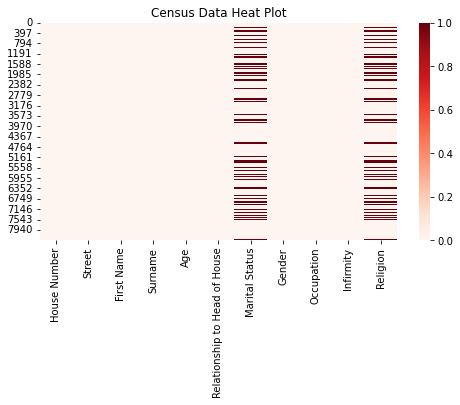

In [5]:
# Plot a graph to show existing null values

plt.figure(figsize = (8,4))
sns.heatmap(census_data.isnull(),cmap='Reds').set(title="Census Data Heat Plot")

Check for ' ' enntries for each column in the data set

In [6]:
# Check for blank entries in the data set

for column in census_data:
    if (census_data[column] == ' ').any() == True:
        print (column)
print("")
print("The following Columns above have blank(' ') entries")

First Name
Surname
Age
Marital Status
Infirmity
Religion

The following Columns above have blank(' ') entries


<b> Preliminary Analysis shows the following issues exist witht the dataset: <b>

1. Marital Status Column has about 2056 missing values
2. Religion column has about 2105 missing values
3. Age column has a wrong data type
4. The age has some data points as float, str and int, all should be int
5. The following columns have blank entries: First Name, Surname, Age, Marital Status, Infirmity, Religion.
    

## C - Cleaning my imported datasets based on the issues summarised above

Cleaning the Age Column (datatype and blank columns)

In [7]:
#inspecting the blank values in the Age column

census_data.loc[census_data['Age'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2206,17,Andrews Mill,Christopher,Johnson,,Husband,Married,Male,Wellsite geologist,None,None
4317,47,Smith Plains,Hugh,Richards,,Son,Single,Male,University Student,None,Christian


In [8]:
"""
Fill in the blank column

Query all the rows that with similar properties and find the average age. 
This means other husbands with no infirmity, with no religion, with ages. 

"""
similar_husband_data = census_data.loc[(census_data['Relationship to Head of House'] == 'Husband') & 
                                       (census_data['Religion'] == 'None') &
                                       (census_data['Infirmity'] == 'None') &
                                       (census_data['Age'] != ' ')]


In [9]:
"""
For the First Blank Cell
Find their mean age of similar and fill the missing husband age

"""

conv_similar_husband_data = pd.to_numeric(similar_husband_data['Age'])
missing_husband_age = conv_similar_husband_data.mean()
print("The average age of similar husbands is: ", int(missing_husband_age))

# Replace the missing age of the first row with the missing husband age
census_data['Age'] = np.where((census_data['Age'] == ' ') & (census_data['Marital Status'] == 'Married'), 50, census_data['Age'])

The average age of similar husbands is:  50


In [10]:
# Repeat the same method for the second blank entry (son)

similar_son_data = census_data.loc[(census_data['Relationship to Head of House'] == 'Son') & 
                                       (census_data['Religion'] == 'None') &
                                       (census_data['Infirmity'] == 'None') &
                                       (census_data['Age'] != ' ') &
                                       (census_data['Occupation'] == 'University Student')]

missing_son_age = (pd.to_numeric(similar_son_data['Age'])).mean()

print("The average age of similar sons is: ", int(missing_son_age))

census_data['Age'] = np.where((census_data['Age'] == ' ') & (census_data['Marital Status'] == 'Single'), 20, census_data['Age'])

print("")

print("The two blank values for the Age column have now been filled ")

The average age of similar sons is:  20

The two blank values for the Age column have now been filled 


In [11]:
# Convert the Age column datatype to the right datatype

census_data["Age"] = census_data['Age'].astype(float).astype(int)

print("The Age datatype has been converted to the right datatype")

The Age datatype has been converted to the right datatype


The Age does not have any value greater that 106 and this is acceptable


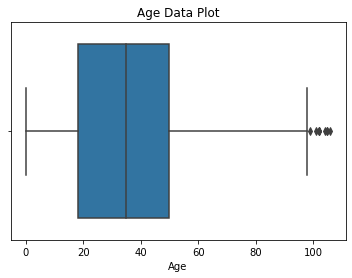

In [12]:
# Plot the Age column to investigate outliers 

sns.boxplot(x = census_data["Age"]).set(title='Age Data Plot')

print("The Age does not have any value greater that 106 and this is acceptable")

Age Column has been cleaned. Clean Marital Status Column with 2056 missing values and blank entries

In [13]:
# Check the unique entries of the column

census_data['Marital Status'].unique()

array(['Single', 'Married', 'Divorced', nan, 'Widowed', ' '], dtype=object)

In [14]:
# Replace every marital status values with 'Single' for individuals below 18

for i in range(len(census_data)):
    if int(census_data["Age"][i]) < 18:
        census_data["Marital Status"][i]  = "Single" 

print("The Null Maritus Status entries have been corrected for individuals below 18")

The Null Maritus Status entries have been corrected for individuals below 18


In [15]:
# Investigating Blank Entries

census_data[(census_data['Marital Status'] ==' ')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
4328,53,Smith Plains,Lynn,Hilton,52,Head,,Female,Hospital doctor,None,Christian
7103,24,Ellis Mountain,Susan,Taylor,19,None,,Female,University Student,None,Christian
7460,30,Freeman Trail,Adrian,King,20,None,,Male,University Student,None,Christian


In [16]:
# Hilton is married from the table shown below
census_data[(census_data['Surname'] =='Hilton')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3515,8,Elvis Via,Mark,Hilton,21,Visitor,Single,Male,University Student,None,None
4145,14,Johnson Fort,Yvonne,Hilton,60,Head,Married,Female,Outdoor activities/education manager,None,Catholic
4328,53,Smith Plains,Lynn,Hilton,52,Head,,Female,Hospital doctor,None,Christian
4329,53,Smith Plains,Adrian,Hilton,53,Husband,Married,Male,"Accountant, chartered management",None,None
4330,53,Smith Plains,Laura,Hilton,27,Daughter,Single,Female,Facilities manager,None,Christian
4331,53,Smith Plains,Richard,Hilton,27,Son,Single,Male,Barrister's clerk,None,Christian
4332,53,Smith Plains,Jean,Hilton,16,Daughter,Single,Female,Student,None,NaN


In [17]:
# fix the first blank cell

census_data["Marital Status"][4328]  = "Married" 

In [18]:
# investigate the second blank entry

census_data[(census_data['Surname'] =='Taylor')& (census_data['House Number'] ==24) ]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2790,24,Dale Road,Wayne,Taylor,14,Son,Single,Male,Student,None,NaN
4089,24,Elizabeth Springs,Charlene,Taylor,45,Head,Single,Female,Land/geomatics surveyor,None,Catholic
4090,24,Elizabeth Springs,Gregory,Taylor,25,Son,Single,Male,"Librarian, public",None,None
7103,24,Ellis Mountain,Susan,Taylor,19,None,,Female,University Student,None,Christian


In [19]:
# susan taylor is single considering she is in school and lives with her parents
# Everybody in that house is single

census_data["Marital Status"][7103]  = "Single" 

In [20]:
#Investigate Adrian King

census_data[(census_data['House Number'] ==30) & (census_data['Street'] == "Freeman Trail")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7458,30,Freeman Trail,Eleanor,Simpson,19,Head,Single,Female,University Student,None,None
7459,30,Freeman Trail,Thomas,Ball,22,None,Single,Male,University Student,None,Catholic
7460,30,Freeman Trail,Adrian,King,20,None,,Male,University Student,None,Christian


In [21]:
# For Adrian, he stays in a university house with other students who are all single. He is likely single as well

census_data["Marital Status"][7460]  = "Single" 

Investigate and clean the First Name Column

In [22]:
census_data[census_data['First Name'] == ' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
7258,10,Thomas Drive,,Taylor,59,Head,Married,Male,Health and safety adviser,None,None


In [23]:
census_data['First Name'].mode()

0        Anne
1    Geoffrey
Name: First Name, dtype: object

In [24]:
"""
This means that one cell is blank, 
I took the mode of the first names, I got 2 names. 
I chose the first one since the missing column was for a man and not a woman
"""

census_data['First Name'].iloc[7258] = 'Geoffrey'
print(" The First Name Column has been cleaned")

 The First Name Column has been cleaned


Investigate and clean the Surname Column

In [25]:
census_data[census_data['Surname'] ==' ']

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5553,5,Gill Mews,Owen,,8,Son,Single,Male,Student,None,NaN


In [26]:
# Now find parents of this child and fill in the surname

census_data[(census_data['Street'] =='Gill Mews') & (census_data['House Number'] ==5)]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
5552,5,Gill Mews,Joyce,Adams,32,Head,Divorced,Female,Unemployed,None,None
5553,5,Gill Mews,Owen,,8,Son,Single,Male,Student,None,NaN
5554,5,Gill Mews,Aaron,Adams,7,Son,Single,Male,Student,None,NaN


In [27]:
# Now we know the surname of that is Adams

census_data['Surname'].iloc[5553] = 'Adams'

Investigate and clean the Religion Column

In [28]:
# Look at the unique religion values:

census_data["Religion"].unique()

array(['Catholic', 'Methodist', 'None', nan, 'Christian', 'Sikh',
       'Muslim', 'Jewish', 'Buddist', ' ', 'Quaker'], dtype=object)

All the religious entries are fine except for the null and blank entries

In [29]:
# Filling the null religion with 'unknown' for data set

religion_mode = census_data["Religion"].mode()
census_data["Religion"] = census_data["Religion"].fillna("Unknown")

In [30]:
census_data[(census_data["Religion"] == ' ')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
3054,23,Riley Avenue,Katherine,Scott,25,Head,Single,Female,Unemployed,None,
6456,1,Gibbs Lane,Donna,Mitchell,85,Head,Divorced,Female,Retired Fast food restaurant manager,None,
6824,53,July Isle,Leon,Marshall,23,None,Single,Male,"Programmer, multimedia",None,
7573,12,Blackhook Lane,Mohamed,Stephens,51,Husband,Married,Male,"Programmer, multimedia",None,


In [31]:
# Fill the blank entries with the mode of the religion column:

census_data["Religion"].iloc[3054] = "None"
census_data["Religion"].iloc[6456] = "None"
census_data["Religion"].iloc[6824] = "None"
census_data["Religion"].iloc[7573] = "None"


Investigate and clean the Infirmity Column

In [32]:
census_data["Infirmity"].unique()

array(['None', 'Physical Disability', 'Mental Disability',
       'Unknown Infection', ' ', 'Disabled', 'Blind', 'Deaf'],
      dtype=object)

In [33]:
# find the blank space:

for i in range(len(census_data["Infirmity"])):
    if census_data["Infirmity"][i] == ' ':
        census_data["Infirmity"][i]  = "None" 

## D - Cleaning my imported datasets: Checking for lies in the Dataset

Check the Gender Column to investigate entries there. We should have only male and female as entries

In [34]:
print("The only two entries in the gender column are: ", census_data["Gender"].unique())


The only two entries in the gender column are:  ['Female' 'Male']


Check the 'House Number' Column for obscure entries

In [35]:
census_data["House Number"].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

The 'House Number' Column looks okay.
     
Check the Street Column for obscure entries

In [36]:
census_data["Street"].unique()

array(['Scott Dale', 'Lee Shoal', 'Zebra Lodge', 'Holyrood Trace',
       'Edwards Mountain', 'Gold Road', 'Mason Roads', 'Peninsula Drive',
       'Leicesterbail Road', 'Hill Heights', 'Wessex Drive',
       'Pinewood Hills', 'Sheppard Way', 'Cumberlandbin Crescent',
       'Charity Road', 'Allen Mission', 'Wessex Crescent',
       'Bathhouse Fords', 'Spencer Keys', 'Armaghspan Avenue',
       'Landings Camp', 'Clearwater Street', 'Andrews Mill',
       'Hall Island', 'Davies Plains', 'Elvis Extensions',
       'Goldfinch Avenue', 'Edwards Drive', 'Castor Groves',
       'Solstice Lane', 'Dale Road', 'Riley Avenue', 'Bronze Crescent',
       'Elvis Via', 'Bishop Avenue', 'Portsmouth Street', 'Weston Inlet',
       'Guardian Crescent', 'Bathhouse Street', 'Parrot Summit',
       'Elizabeth Springs', 'Johnson Fort', 'Smith Plains', 'Rice Street',
       'Smith Shoal', 'Toucan Divide', 'Taylor Avenue', 'Williams Road',
       'Bronze Greens', 'Column Valley', 'Harrison Street', 'Khan Cre

The Street Column looks okay.
   
Check the Relation to Head of House Column for obscure entries

In [37]:
census_data["Relationship to Head of House"].unique()

array(['Head', 'Partner', 'Husband', 'Son', 'None', 'Daughter', 'Wife',
       'Grandson', 'Lodger', 'Visitor', 'Cousin', 'Step-Son', 'Sibling',
       'Granddaughter', 'Step-Daughter', 'Adopted Son', 'Nephew',
       'Adopted Daughter', 'Son-in-law', 'Neice', 'Daughter-in-law',
       'Adopted Grandson', 'Adopted Granddaughter'], dtype=object)

Replace 'Niece' with 'Neice' entries

In [38]:
census_data["Relationship to Head of House"].replace('Neice','Niece',inplace = True)

Check for any individual below 18 and are married or the head of the house

In [39]:
census_data[(census_data['Age'] < 18) & (census_data['Marital Status'] != "Single")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [40]:
census_data[(census_data['Age'] < 18) & (census_data['Relationship to Head of House'] == "Wife")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [41]:
census_data[(census_data['Age'] < 18) & (census_data['Relationship to Head of House'] == "Partner")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion


In [42]:
census_data[(census_data['Age'] < 18) & (census_data['Relationship to Head of House'] == "Head")]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion
2432,7,Edwards Drive,Jenna,Browne,17,Head,Single,Female,Student,None,Unknown
2665,17,Solstice Lane,Gail,Doyle,16,Head,Single,Female,Student,None,Unknown


Fix the the obscure 'Relationship to Head of House' Values

In [43]:
census_data["Relationship to Head of House"].iloc[2432] = "Daughter"
census_data["Relationship to Head of House"].iloc[2665] = "Daughter"

## E - Census Data Analysis & Visualizations 

### Age Visualization

[Text(0.5, 1.0, 'Age Histogram Plot')]

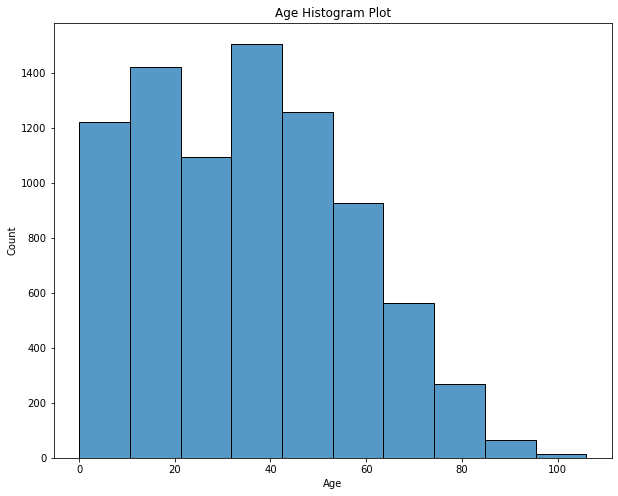

In [44]:
plt.figure(figsize = (10,8))

sns.histplot(data = census_data,x="Age", bins = 10).set(title='Age Histogram Plot')

[Text(0.5, 1.0, 'Age Histogram Plot with Gender Saturation')]

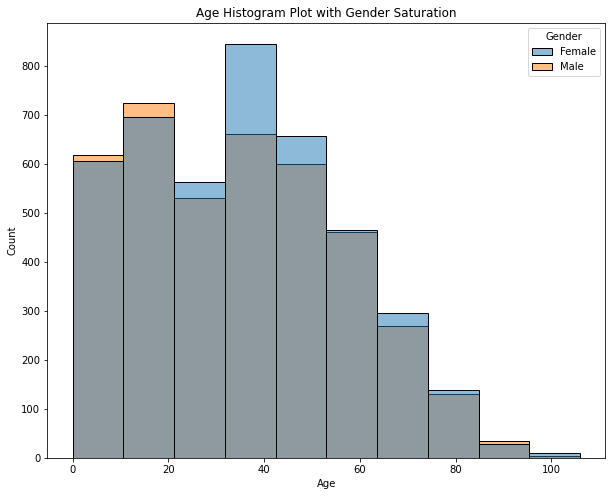

In [45]:
plt.figure(figsize = (10,8))

sns.histplot(data = census_data,x="Age",hue = 'Gender', bins = 10).set(title='Age Histogram Plot with Gender Saturation')

### Population Pyramid

In [46]:
census_data['Age_Dist'] = pd.cut(x=census_data['Age'], bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110])


In [47]:
census_data_dist = census_data.groupby(['Age_Dist','Gender'])
population_dist = census_data_dist.size().unstack()
population_dist_fem = population_dist['Female']
population_dist_male = population_dist['Male'] * -1

new_population_df = pd.DataFrame({'Age': ['0-4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95-99','100+'], 
                    'Male': population_dist_male, 
                    'Female': population_dist_fem})

[Text(0.5, 0, 'Population'),
 Text(0, 0.5, 'Age-Dist'),
 Text(0.5, 1.0, 'Population Pyramid')]

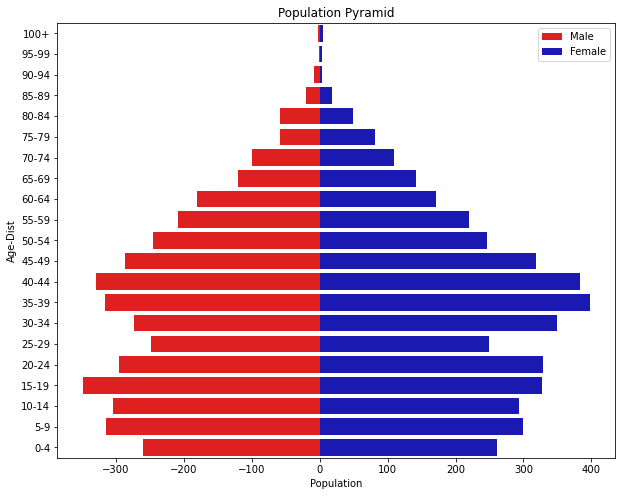

In [48]:
plt.figure(figsize=(10,8))

AgeDist = ['100+','95-99','90-94','85-89','80-84','75-79','70-74','65-69','60-64','55-59','50-54','45-49','40-44','35-39','30-34','25-29','20-24','15-19','10-14','5-9','0-4']
pyramid_plot = sns.barplot(x='Male', y='Age', data = new_population_df,color=('red'),  order=AgeDist,label='Male',)
pyramid_plot = sns.barplot(x='Female', y='Age', data = new_population_df,color=('mediumblue'), order=AgeDist,label='Female',)

pyramid_plot.legend()
pyramid_plot.set(xlabel="Population", ylabel="Age-Dist", title = "Population Pyramid")

### Employment trends

In [49]:
def occupation_category(status):
#     if 'Student' in status:
#         return 'Student'
    if 'Retired' in status:
        return 'Retired'
    if 'Unemployed' in status:
        return 'Unemployed'
    if status not in ['Student', 'Student','Retired','Unemployed','Child','University Student']:
        return 'Employed'
    else:
        return status


In [50]:
census_data['Occupation Category'] = census_data['Occupation'].map(occupation_category)

In [51]:
# Ensure anyone above 65 is not regarded as unemployed

for i in range(len(census_data["Occupation Category"])):
    if census_data["Age"][i] > 65:
        census_data["Occupation Category"][i] = "Retired" 

In [52]:
census_data["Occupation Category"].value_counts()

Employed              4342
Student               1669
Retired                783
University Student     559
Child                  500
Unemployed             476
Name: Occupation Category, dtype: int64

In [53]:
print("Unemployment Rate is at: ", round(476/(4342+476)*100), "%")

Unemployment Rate is at:  10 %


[Text(0.5, 1.0, 'Occupation Category Plot'), Text(0, 0.5, 'Population Count')]

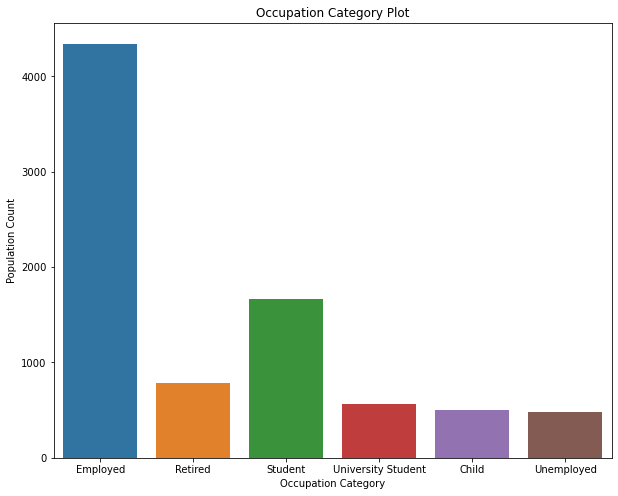

In [54]:
plt.figure(figsize=(10,8))

sns.countplot(data = census_data, x = census_data["Occupation Category"]).set(title="Occupation Category Plot", ylabel = 'Population Count')

<AxesSubplot:xlabel='Age', ylabel='Occupation Category'>

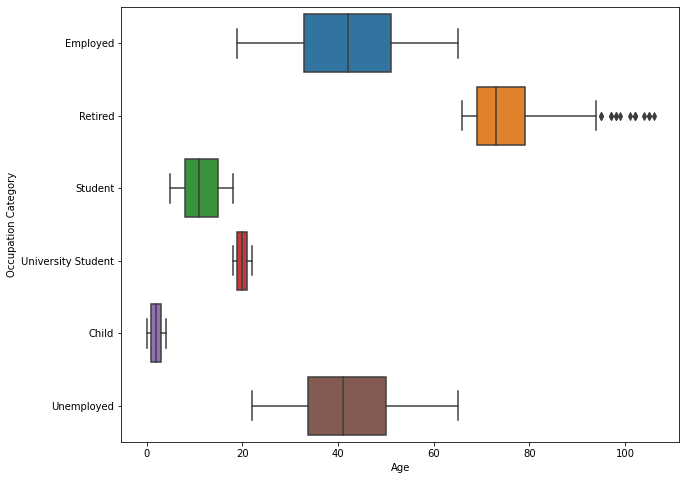

In [55]:
plt.figure(figsize=(10,8))


sns.boxplot(data = census_data, x = 'Age',y = 'Occupation Category')

### Religion Distribution

[Text(0.5, 1.0, 'Religion Distribution'), Text(0, 0.5, 'Population Count')]

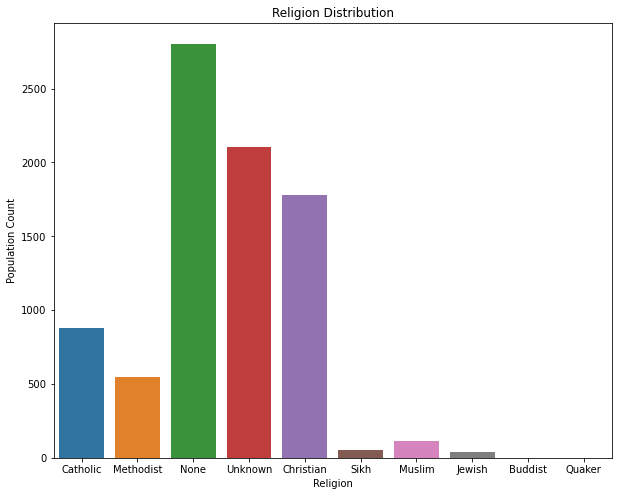

In [56]:
plt.figure(figsize=(10,8))

sns.countplot(data = census_data,x="Religion").set(title='Religion Distribution', ylabel = "Population Count")

In [57]:
census_data["Religion"].value_counts()

None         2804
Unknown      2105
Christian    1781
Catholic      881
Methodist     547
Muslim        115
Sikh           55
Jewish         38
Quaker          2
Buddist         1
Name: Religion, dtype: int64

[Text(0.5, 1.0, 'Average age for each religion')]

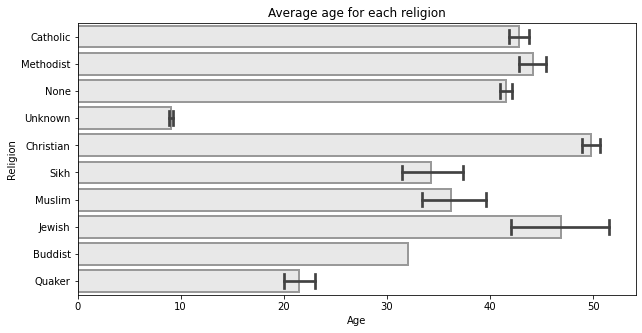

In [58]:
plt.figure(figsize = (10,5))

sns.barplot(
    data=census_data, x = "Age", y = 'Religion',capsize=.5,  linewidth=2, edgecolor=".6", facecolor=(.9,.9, .9, .9),).set(title = "Average age for each religion")

### Infirmity

In [59]:
infirmity_ = census_data["Infirmity"].value_counts()

In [60]:
infirmity_

None                   8269
Physical Disability      17
Mental Disability        13
Blind                    10
Unknown Infection         8
Deaf                      8
Disabled                  4
Name: Infirmity, dtype: int64

In [61]:
infirmity_.to_frame()

,Infirmity
None,8269
Physical Disability,17
Mental Disability,13
Blind,10
Unknown Infection,8
Deaf,8
Disabled,4


### Occupation - University Students

In [62]:
census_data[(census_data['Occupation'] =='University Student')]

,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Age_Dist,Occupation Category
19,8,Scott Dale,Teresa,Ball,22,Daughter,Single,Female,University Student,None,Christian,"(20, 25]",University Student
34,13,Scott Dale,Amy,Dennis,19,Wife,Married,Female,University Student,None,None,"(15, 20]",University Student
45,19,Scott Dale,Derek,Todd,21,Head,Married,Male,University Student,None,Christian,"(20, 25]",University Student
46,19,Scott Dale,Maureen,Todd,19,Wife,Married,Female,University Student,None,Christian,"(15, 20]",University Student
55,22,Scott Dale,Diana,Gill,20,Lodger,Divorced,Female,University Student,None,None,"(15, 20]",University Student
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8281,1,White Granary,Dawn,Jones,20,Daughter,Single,Female,University Student,None,Christian,"(15, 20]",University Student
8305,1,Jones Barracks,Andrew,Stevenson,20,Son,Single,Male,University Student,None,None,"(15, 20]",University Student
8306,1,Jones Barracks,Ruth,Stevenson,20,Daughter,Divorced,Female,University Student,None,None,"(15, 20]",University Student
8313,1,Jones Barracks,Emma,Price,20,Lodger,Single,Female,University Student,None,Christian,"(15, 20]",University Student


### Occupancy

In [63]:
occupancy_rate = census_data.groupby(['House Number','Street']).size()#.reset_index(name='Occupancy')


In [64]:
occupancy_rate.to_frame(name = ("Occupancy_Rate")).describe()

,Occupancy_Rate
count,2824.000000
mean,2.949363
std,2.045338
min,1.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,22.000000


### BirthRate

In [65]:

census_birth_count = census_data[(census_data['Age'] == 0)]['Age'].value_counts().sum()


In [66]:
woman_birth_count =  census_data[(census_data['Gender'] == 'Female') & ((census_data['Age'] >= 25) & (census_data['Age'] <= 29))].value_counts().sum()

In [67]:
crude_birth_rate = (census_birth_count / 8329)*1000

In [68]:
print("The birth rate per 1000 is: ",round(crude_birth_rate,2))

The birth rate per 1000 is:  10.57


### Death Rate

In [69]:
current_pop_num = census_data[census_data['Age'].between(0,106)].groupby('Age').size()
previous_pop_num = current_pop_num.shift(-1)

In [70]:
diff_in_pop = current_pop_num - previous_pop_num
diff_in_pop = diff_in_pop.reset_index(name='Count')
death = diff_in_pop[diff_in_pop['Count'] < 0].sum()



In [71]:
death

Age      1858.0
Count    -444.0
dtype: float64

In [72]:
crude_death_rate = (444/8329) * 1000

In [73]:
print("The death rate per 1000 is: ",round(crude_death_rate,2) )

The death rate per 1000 is:  53.31


### Dependency Ratio

In [74]:
child_pop= census_data[(census_data['Age'] <= 14)]['Gender'].value_counts().sum()
elder_pop = census_data[(census_data['Age'] >65)]['Gender'].value_counts().sum()
work_population = census_data[(census_data['Age'] >= 15) & (census_data['Age'] <= 65)]['Gender'].value_counts().sum()

dep_ratio = ((child_pop+elder_pop)/work_population) * 100
print('The dependency ratio is: ',round(dep_ratio,2))

The dependency ratio is:  42.57


### Commuters

In [75]:
commuters = census_data[(census_data['Relationship to Head of House'] == "Visitor")]['Gender'].value_counts().sum() + census_data[(census_data['Occupation'] == "University Student")]['Gender'].value_counts().sum()

percent_commuters = (commuters/8329) * 100
print("The percentage of Commuters is :",round(percent_commuters,2))

The percentage of Commuters is : 7.06
